In [1]:
import pandas as pd
import numpy as np

In [2]:
#pip install google_play_scraper

In [3]:
#pip install app_store_scraper

In [4]:
from google_play_scraper import app,Sort,reviews_all
from app_store_scraper import AppStore

In [5]:
review=reviews_all('com.tool.simple.calculator')

In [62]:
df=pd.json_normalize(review)

In [63]:
df.head(2)

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt
0,2faeebe6-6506-4c95-8a4b-c6e9dc8ac3b7,Aima Husnain,https://play-lh.googleusercontent.com/a-/AD5-W...,Good,5,0,1.0,2023-02-03 13:18:47,None,None
1,f8f6104d-f195-4318-afe9-e7f205f84735,Ravi Meti,https://play-lh.googleusercontent.com/a-/AD5-W...,Super but not showing history,3,0,1.0,2023-01-28 20:27:26,None,None


In [64]:
df.columns

Index(['reviewId', 'userName', 'userImage', 'content', 'score',
       'thumbsUpCount', 'reviewCreatedVersion', 'at', 'replyContent',
       'repliedAt'],
      dtype='object')

In [65]:
df=df[['content','score']]
df.head()

,content,score
0,Good,5
1,Super but not showing history,3
2,I install only viewer good result my remrks OS...,5
3,Oliverfd. H,5
4,"Exceptional,Amazing,outstanding,I have tried s...",5


In [66]:
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
stemmer=PorterStemmer()

In [67]:
def preprocessing(data):
    data=data.lower()
    data=re.sub('[^a-z ]','',str(data))
    data=data.split()
    data=[stemmer.stem(word) for word in data if word not in stopwords.words('english')]
    #data=stemmer.stem(data)
    data=" ".join(data)
    return data

In [68]:
d='how aRe U;;;'
preprocessing(d)

'u'

In [69]:
df['content']=df['content'].apply(preprocessing)

In [70]:
df.isnull().sum()

content    0
score      0
dtype: int64

In [71]:
df.head()

,content,score
0,good,5
1,super show histori,3
2,instal viewer good result remrk osm thnxdevlop,5
3,oliverfd h,5
4,exceptionalamazingoutstandingi tri mani calcul...,5


In [77]:
df.shape

(85, 2)

array([<AxesSubplot:title={'center':'content'}, xlabel='score'>],
      dtype=object)

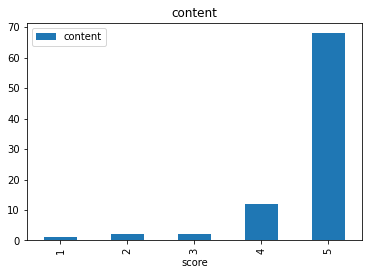

In [78]:
df.groupby('score').agg('count').plot(kind='bar',subplots=True)

In [48]:
x=df.content
y=df.score

In [49]:
from sklearn.model_selection import train_test_split as tts
x_train,x_test,y_train,y_test=tts(x,y,random_state=34,test_size=0.2)

In [50]:
from sklearn.feature_extraction.text import TfidfVectorizer
c=TfidfVectorizer()

In [51]:
x_train=c.fit_transform(x_train).toarray()
x_test=c.transform(x_test).toarray()

In [52]:
x_test

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.41997274],
       [0.        , 0.29260253, 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [53]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
lr=LogisticRegression()
dt=DecisionTreeClassifier()
rf=RandomForestClassifier()

In [54]:
model1=lr.fit(x_train,y_train)
model1_pre=lr.predict(x_test)

In [55]:
model2=dt.fit(x_train,y_train)
model2_pre=dt.predict(x_test)

In [56]:
model3=rf.fit(x_train,y_train)
model3_pre=rf.predict(x_test)

In [57]:
print('LogisticRegression',classification_report(y_test,model1_pre))
print('DecisionTreeClassifier',classification_report(y_test,model2_pre))
print('RandomForestClassifier',classification_report(y_test,model3_pre))

LogisticRegression               precision    recall  f1-score   support

           4       0.00      0.00      0.00         3
           5       0.82      1.00      0.90        14

    accuracy                           0.82        17
   macro avg       0.41      0.50      0.45        17
weighted avg       0.68      0.82      0.74        17

DecisionTreeClassifier               precision    recall  f1-score   support

           4       0.14      0.33      0.20         3
           5       0.80      0.57      0.67        14

    accuracy                           0.53        17
   macro avg       0.47      0.45      0.43        17
weighted avg       0.68      0.53      0.58        17

RandomForestClassifier               precision    recall  f1-score   support

           4       0.00      0.00      0.00         3
           5       0.82      1.00      0.90        14

    accuracy                           0.82        17
   macro avg       0.41      0.50      0.45        17
weighted 

C:\Users\ankus\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ankus\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ankus\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ankus\Anaconda3\lib\site-packages\sklearn\metr